# The fillna function

In the previous lesson, we saw how to drop rows and columns that contain missing values. Dropping may not be the best option in many cases, though. Another option for handling missing values is to replace them with an actual value with the fillna function.

The value to be used as a replacement for missing values depend on the characteristics of the data. We may choose to replace missing values with the average value of the column or the most frequent value in the column. We will be creating the following DataFrame to do the examples. Let’s start with replacing the missing value in column A with the average value of this column.



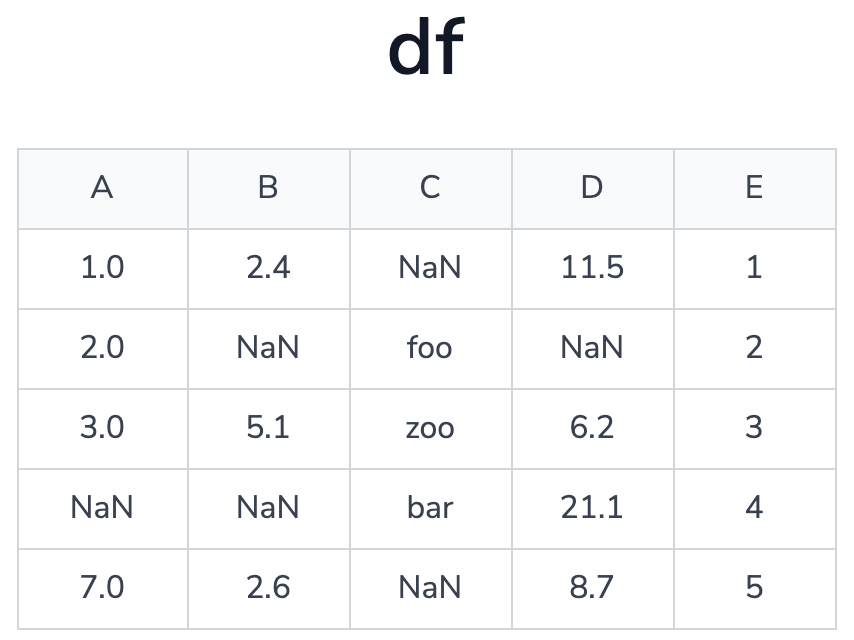

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "A": [1, 2, 3, np.nan, 7],
    "B": [2.4, np.nan, 5.1, np.nan, 2.6],
    "C": [np.nan, "foo","zoo","bar", np.nan],
    "D": [11.5, np.nan, 6.2, 21.1, 8.7],
    "E": [1, 2, 3, 4, 5]
})

df["A"] = df["A"].fillna(value = df["A"].mean())

In [5]:
df

,A,B,C,D,E
0,1.00,2.4,NaN,11.5,1
1,2.00,NaN,foo,NaN,2
2,3.00,5.1,zoo,6.2,3
3,3.25,NaN,bar,21.1,4
4,7.00,2.6,NaN,8.7,5


The value used as the replacement is passed to the value parameter. This parameter also accepts a Python dictionary, so we can replace the missing values in different columns in a single operation.

In [6]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "A": [1, 2, 3, np.nan, 7],
    "B": [2.4, np.nan, 5.1, np.nan, 2.6],
    "C": [np.nan, "foo","zoo","bar", np.nan],
    "D": [11.5, np.nan, 6.2, 21.1, 8.7],
    "E": [1, 2, 3, 4, 5]
})

# find the replacement values
value_a = df["A"].mean()
value_d = df["D"].mean()

# replace the missing values
print(df.fillna({"A": value_a, "D": value_d}))

      A    B    C       D  E
0  1.00  2.4  NaN  11.500  1
1  2.00  NaN  foo  11.875  2
2  3.00  5.1  zoo   6.200  3
3  3.25  NaN  bar  21.100  4
4  7.00  2.6  NaN   8.700  5


To reiterate, determining the replacement value depends on the characteristics of the data. For instance, if our data consists of the daily stock prices, filling a missing value with the previous or next value is more optimal than using the average. This is a commonly used approach in time-series data. The fillna function performs this operation easily with the method parameter.

1. method = "bfill": Replace missing values backward, which means that a missing value is replaced by the value that comes after it.

2. method = "ffill": Replace missing values forward, which means that a missing value is replaced by the value that comes before it.

In [7]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "A": [1, 2, 3, np.nan, 7],
    "B": [2.4, np.nan, 5.1, np.nan, 2.6],
    "C": [np.nan, "foo","zoo","bar", np.nan],
    "D": [11.5, np.nan, 6.2, 21.1, 8.7],
    "E": [1, 2, 3, 4, 5]
})

print("Filling backward")
print(df["A"].fillna(method="bfill"))

print("\nFilling forward")
print(df["A"].fillna(method="ffill"))

Filling backward
0    1.0
1    2.0
2    3.0
3    7.0
4    7.0
Name: A, dtype: float64

Filling forward
0    1.0
1    2.0
2    3.0
3    3.0
4    7.0
Name: A, dtype: float64


/var/folders/xf/3bf42sf15wjfggk9wwj3xr7h0000gn/T/ipykernel_22727/1209054227.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df["A"].fillna(method="bfill"))
/var/folders/xf/3bf42sf15wjfggk9wwj3xr7h0000gn/T/ipykernel_22727/1209054227.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df["A"].fillna(method="ffill"))


If there are consecutive missing values and we use the forward or backward fill, the fillna function replaces all missing values consecutively. We can limit the number of missing values to be filled with the forward and backward replacement by using the limit parameter. Let’s look at a quick example to demonstrate how the limit parameter works.



In [8]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "A": [1, 2, np.nan, np.nan, 8]
})

print("Without the limit parameter")
print(df.fillna(method="bfill"))

print("\nWith the limit parameter")
print(df.fillna(method="bfill", limit=1))

Without the limit parameter
     A
0  1.0
1  2.0
2  8.0
3  8.0
4  8.0

With the limit parameter
     A
0  1.0
1  2.0
2  NaN
3  8.0
4  8.0


/var/folders/xf/3bf42sf15wjfggk9wwj3xr7h0000gn/T/ipykernel_22727/1675460008.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.fillna(method="bfill"))
/var/folders/xf/3bf42sf15wjfggk9wwj3xr7h0000gn/T/ipykernel_22727/1675460008.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.fillna(method="bfill", limit=1))


When we set the limit parameter as one, only one value is replaced backward. Just like with the dropna function, we need to set the value of the inplace parameter as True to save the changes in the original DataFrame.


